Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [166]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [121]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/03_Classification'
except ImportError as e:
    pass

## Exercise 3: Classification

### 3.1. Should we play golf?
The Golf data set models different aspects of the weather (outlook, temperature, humidity, forecast) that are relevant for deciding whether one should play golf or not.

In [175]:
import pandas as pd
golf = pd.read_csv('golf.csv')
golf.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


#### 3.1.1 Learn a naïve bayes model from the Golf data set. Use this model to classify the examples in the Golf-Testset. 

- Think about ways how you can evaluate the performance of your model. 
- Which measures can be calculated from the resulting dataset?

In [140]:
# create a variable with the values of the target variable

le = LabelEncoder()
golf_target = le.fit_transform(golf.Play) 

# and remove it from the dataframe so it only contains the features that our model should use; assign it to a new variable
golf = golf.drop(columns=['Play'])


In [142]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(golf, golf_target,test_size=0.2, random_state=4, stratify=golf_target)

In [143]:
# golf_one_hot_train = data_train.copy()
# golf_one_hot_test = data_test.copy()

# encoded = pd.DataFrame(one_hot_encoder.fit_transform(golf_one_hot_train[['Outlook', 'Wind']]).toarray(), 
#                        columns=one_hot_encoder.get_feature_names(['Outlook', 'Wind']))

# golf_one_hot_train = golf_one_hot_train.drop(columns=['Outlook', 'Wind'])
# golf_one_hot_train = golf_one_hot_train.join(encoded)

In [144]:
one_hot_encoder = preprocessing.OneHotEncoder()

data_train_hot = pd.DataFrame(one_hot_encoder.fit_transform(data_train[['Outlook', 'Wind']]).toarray(), 
                       columns=one_hot_encoder.get_feature_names(['Outlook', 'Wind']))
data_test_hot = pd.DataFrame(one_hot_encoder.transform(data_test[['Outlook', 'Wind']]).toarray(), 
                       columns=one_hot_encoder.get_feature_names(['Outlook', 'Wind']))


In [145]:
data_train = data_train.drop(columns=['Outlook', 'Wind'])
data_test = data_test.drop(columns=['Outlook', 'Wind'])

In [150]:
#!!!!!!!!!!!
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [151]:
data_train = data_train.join(data_train_hot)
data_test = data_test.join(data_test_hot)

In [155]:
# better do scaling
scaler = preprocessing.StandardScaler()
data_train[['Temperature', 'Humidity']] = scaler.fit_transform(data_train[['Temperature', 'Humidity']])
data_test[['Temperature', 'Humidity']] = scaler.transform(data_test[['Temperature', 'Humidity']])

In [157]:
#import Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
#instantiate the an estimator and fit it to the data
naive_bayes = GaussianNB()
naive_bayes.fit(data_train, target_train)

GaussianNB()

In [162]:
#apply the model (predict)
test_prediction = naive_bayes.predict(data_test)
# add the prediction and gold standard (target) to the dataframe
test_prediction

array([0, 1, 1])

In [163]:
target_test

array([0, 1, 1])

#### 3.1.2 Evaluate the performance of your model.
- by calling confusion_matrix, accuracy_score and classification_report
- examine the confusion matrix. What is the accuracy of your classifier?

In [ ]:
# accuracy = 1

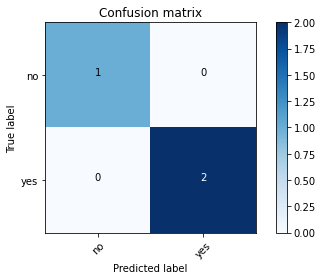

In [172]:
cnf_matrix = confusion_matrix(target_test, test_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=le.classes_)

#### 3.1.3 Does a k-nearest-neighbor classifier work better for this task? 
- Check how the accuracy of your classifier changes to find out. 
- Do different values of k improve the performance?

### 3.2. Learning a classifier for the Iris Data Set
You want to learn and evaluate a classifier for recognizing different types of Iris flowers.

#### 3.2.1 Let’s try the Naïve Bayes algorithm first.
Create a train/test split (with function train_test_split) with 30% test size and stratified sampling.  Evaluate the accuracy of the learned model.

In [8]:
# load the data

# create the train/test split

# learn Naïve Bayes

# evaluate

#### 3.2.2 Try a k-nearest-neighbor classifier on the problem. Does it perform better?

### 3.3 More Classification
In the lecture, you learned about the logistic regression. 
#### 3.3.1 Compare kNN and logistic regression using the “Weighting” dataset.

In [ ]:
weighting = pd.read_csv("weighting.csv")
display(weighting.head())

weighting_target = preprocessing.LabelEncoder().fit_transform(weighting['weighting.dat (7)'])

weighting_data = weighting.drop(columns='weighting.dat (7)')

# TODO: make train test split

# TODO: try out KNeighborsClassifier and LogisticRegression (you can also play around with the model hyperparameters)

In [9]:
#now try the same and use a pipeline with preprocessing.MinMaxScaler() as the first step